<a href="https://colab.research.google.com/github/yashkaushik02/CodSoft-ML/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link: *https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb*


In [1]:

import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv("/content/train_data.txt", sep = ":::", names = ['TITLE','GENRE','DESCRIPTION'])


<ipython-input-5-5f82d372de7d>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("/content/train_data.txt", sep = ":::", names = ['TITLE','GENRE','DESCRIPTION'])


In [6]:
data

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
6307,"""Show de Polícia"" (2012)",reality-tv,Go to an event with large crowds is always fu...
6308,6A (2016),drama,"As if immersed in the situation, the viewer w..."
6309,Anche nel west c'era una volta Dio (1968),western,A stranger being chased by bandits dies in an...
6310,"""The Generation Gap"" (1969)",game-show,A tram of three teenagers faces off against a...


In [7]:
D_train.describe()

,TITLE,GENRE,DESCRIPTION
count,3178,3178,3178
unique,3178,27,3177
top,Oscar et la dame rose (2009),drama,"Held since 2005, Film Spring Open-Air has bee..."
freq,1,799,2


# **Data Preprocessing**

In [10]:
D_train.isna()

,TITLE,GENRE,DESCRIPTION
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
3174,False,False,False
3175,False,False,False
3176,False,False,False
3177,False,False,False


In [13]:
D_train.isna().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [14]:
D_train.shape

(3178, 3)

In [15]:
D_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3178 entries, 1 to 3178
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        3178 non-null   object
 1   GENRE        3178 non-null   object
 2   DESCRIPTION  3178 non-null   object
dtypes: object(3)
memory usage: 99.3+ KB


# **EDA**

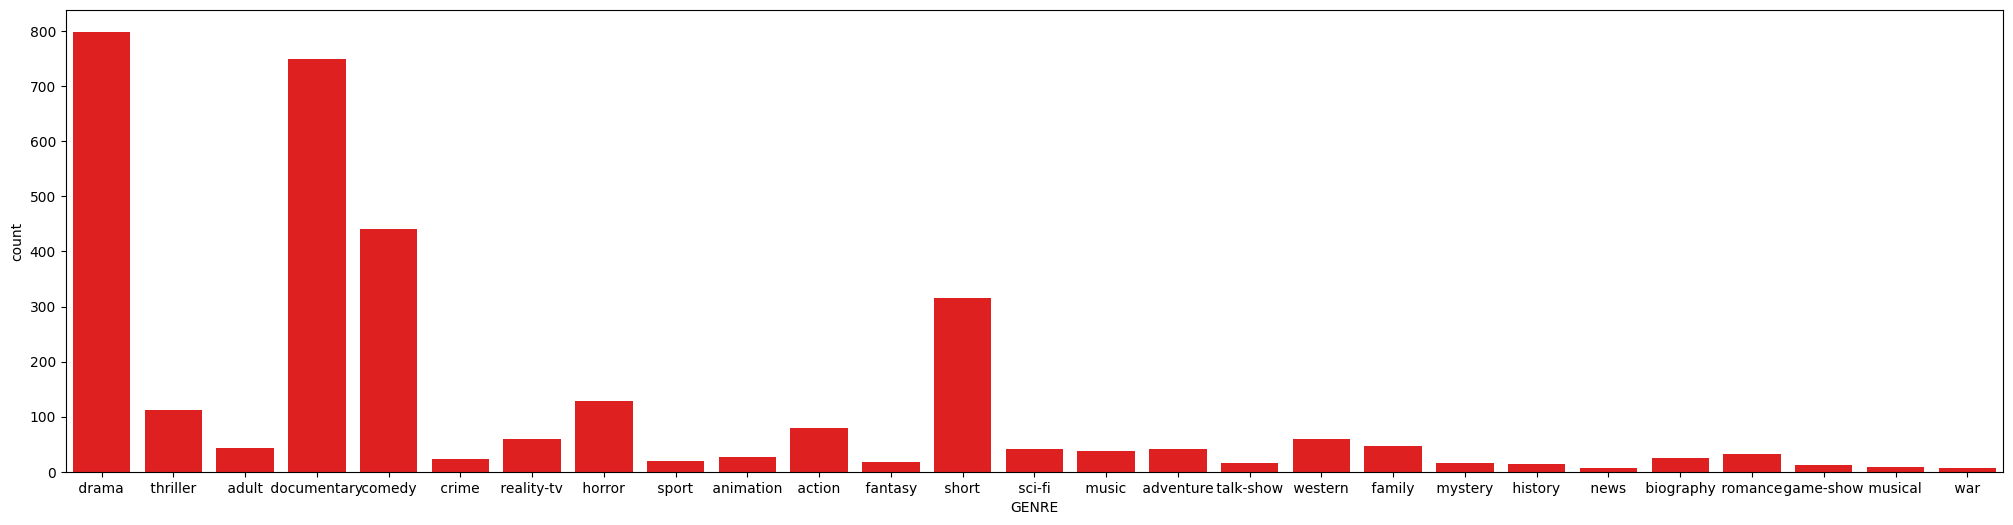

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,6))
sns.countplot(data=D_train, x="GENRE", color = "red")
plt.show()

# **NLP**

In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
wnl = WordNetLemmatizer()
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
stop_words = set(stopwords.words("english"))
import string

def preproc(text):
    text = text.lower()
    text = "".join([word for word in text if word not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    return text

D_train["NEW_DESCRIPTION"] = D_train["DESCRIPTION"].apply(preproc)


In [26]:
D_train

,TITLE,GENRE,DESCRIPTION,NEW_DESCRIPTION
1,Oscar et la dame rose (2009),drama,listening conversation doctor parents 10yearol...,listening conversation doctor parents 10yearol...
2,Cupid (1997),thriller,brother sister past incestuous relationship cu...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,bus empties students field trip museum natural...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,help unemployed father make ends meet edith tw...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,films title refers unrecovered bodies ground z...,films title refers unrecovered bodies ground z...
...,...,...,...,...
3174,Frustré (2013),crime,fabrice lombard neither means looks attract fe...,fabrice lombard neither means looks attract fe...
3175,The Deafening Silence of a Very Bright Light ...,drama,photographer barnard jacobs dying seems bad as...,photographer barnard jacobs dying seems bad as...
3176,Whiskey and Apple Pie: A Journey Across Ameri...,documentary,whiskey apple pie thought provoking heartwarmi...,whiskey apple pie thought provoking heartwarmi...
3177,Not Your Life (2013),documentary,born nepalese father israeli mother kaya forei...,born nepalese father israeli mother kaya forei...


# **Fitting and Transforming**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tf = TfidfVectorizer()
x_train = tf.fit_transform(D_train['DESCRIPTION'])

In [31]:
x = x_train
y = D_train['GENRE']
x

<3178x29430 sparse matrix of type '<class 'numpy.float64'>'
	with 156001 stored elements in Compressed Sparse Row format>